###
## Previous Code:
###

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression

In [2]:
ttn = pd.read_csv('titanic-1hotencoding.csv')
ttn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   survived    891 non-null    int64  
 1   sex         891 non-null    int64  
 2   age         891 non-null    int64  
 3   sibsp       891 non-null    int64  
 4   parch       891 non-null    int64  
 5   fare        891 non-null    float64
 6   adult_male  891 non-null    int64  
 7   alone       891 non-null    int64  
 8   embarked_C  891 non-null    int64  
 9   embarked_Q  891 non-null    int64  
 10  who_child   891 non-null    int64  
 11  who_man     891 non-null    int64  
 12  pclass_1    891 non-null    int64  
 13  pclass_2    891 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 97.6 KB


In [3]:
input_cols = list(ttn.columns[1:])
target_cols = 'survived'


In [4]:
X = ttn[input_cols]
y = ttn[target_cols]

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [7]:
model = LogisticRegression(max_iter = 1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [8]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0], dtype=int64)

In [9]:
pd.DataFrame({'Orignal Values' : y_test, 'Predicted Values' : model.predict(X_test)})

,Orignal Values,Predicted Values
709,1,0
439,0,0
840,0,0
720,1,1
39,1,1
...,...,...
821,1,0
633,0,0
456,0,0
500,0,0


In [10]:
model.score(X_test, y_test)

0.8171641791044776

###
## Recursive Feature Elimination:
###

### Feature Section | Recursive Feature Elimination

Given an external estimator that asssigns weight to features, recursive feature elimination (RFE) is to select features by recursively considering small and smaller sets of features. First, the estimator is trained on the initial set of features and the importance of each feature is obtained either through a coef_attribute or through a feature_importances_attribute. Then, tha least important features are pruned from current set of features. That procedure is recursively repeated on the pruned set until the desired number of features to select is eventually reached.

**Simple Explanation:**

Recursive Feature Elimination (RFE) is a process used in machine learning to select the most important features (variables) for building a predictive model. Here's a simpler explanation:

**1) Start with All Features:** Begin with all the available features in your dataset.

**2) Train the Model:** Use a machine learning model (like a decision tree, support vector machine, etc.) to learn from the data. This model can tell you how important each feature is for making predictions.

**3) Rank the Features:** Look at the importance scores given by the model. Some features will be more important for making accurate predictions, while others will be less important.

**4) Remove the Least Important Features:** Identify the least important feature and remove it from the dataset.

**5) Repeat the Process:** With the reduced set of features, train the model again, rank the features, and remove the least important one.

**6) Continue Until Desired Number of Features:** Keep repeating steps 4 and 5 until you are left with the desired number of features.

For example, if you start with 10 features and want to end up with 3 features, you will repeat the process until you have eliminated 7 features, leaving you with the 3 most important ones.

The idea is to gradually eliminate the less important features, focusing more and more on the most important ones, thereby simplifying the model and potentially improving its performance.

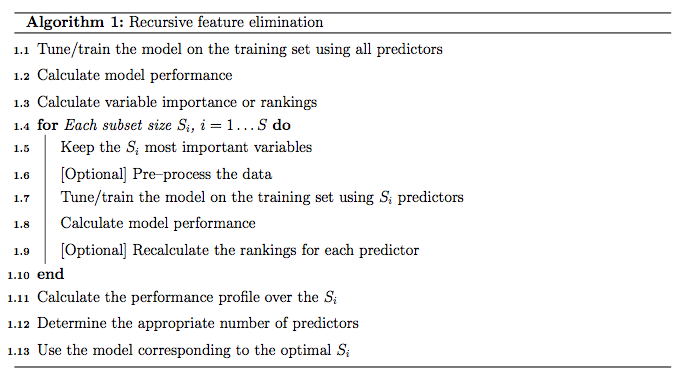

###
## Importing feature_selection
###

In [13]:
from sklearn.feature_selection import RFE

###
## Splitting Dataset Into Seen & Unseen Data
###

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)

###
## Training Algorithm
###

In [15]:
model1 = LogisticRegression(max_iter = 1000)
rfe = RFE(estimator = model1, n_features_to_select = 5, verbose = 1)
rfe.fit(X_train, y_train)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


RFE(estimator=LogisticRegression(max_iter=1000), n_features_to_select=5,
    verbose=1)

###
## This'll Show You The Selected Features
###

In [17]:

rfe.support_
selected_col = X_train.columns[rfe.support_]
selected_col 

Index(['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2'], dtype='object')

###
## Finding Best Features
###

In [18]:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
model1 = LogisticRegression(max_iter = 1000)
rfe = RFE(estimator = model1, n_features_to_select = 5, verbose = 1)
rfe.fit(X_train, y_train)
selected_col = X_train.columns[rfe.support_]

model1.fit(X_train[selected_col], y_train)
model1.score(X_test[selected_col], y_test)

Fitting estimator with 13 features.
Fitting estimator with 12 features.
Fitting estimator with 11 features.
Fitting estimator with 10 features.
Fitting estimator with 9 features.
Fitting estimator with 8 features.
Fitting estimator with 7 features.
Fitting estimator with 6 features.


0.7947761194029851

###
## Programming To Find Best Features
###

In [19]:
def find_best_feature(n):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)
    model1 = LogisticRegression(max_iter = 1000)
    rfe = RFE(estimator = model1, n_features_to_select = n, verbose = 0)
    rfe.fit(X_train, y_train)
    selected_col = X_train.columns[rfe.support_]

    model1.fit(X_train[selected_col], y_train)
    score = model1.score(X_test[selected_col], y_test)
    print('Selected Columns:', list(selected_col))
    print(f'Score: {score * 100:.3f} %')
    print(f'n: {n}')
    print('-' * 50)

In [20]:
for i in range(1, X.shape[1]):
    print(i)
X.shape[1]

1
2
3
4
5
6
7
8
9
10
11
12


13

In [21]:
for i in range(1, X.shape[1] + 1):
    print(f'{i}) ')
    find_best_feature(i)

1) 
Selected Columns: ['who_man']
Score: 79.478 %
n: 1
--------------------------------------------------
2) 
Selected Columns: ['who_man', 'pclass_1']
Score: 79.478 %
n: 2
--------------------------------------------------
3) 
Selected Columns: ['adult_male', 'who_man', 'pclass_1']
Score: 79.478 %
n: 3
--------------------------------------------------
4) 
Selected Columns: ['adult_male', 'who_man', 'pclass_1', 'pclass_2']
Score: 79.478 %
n: 4
--------------------------------------------------
5) 
Selected Columns: ['adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
Score: 79.478 %
n: 5
--------------------------------------------------
6) 
Selected Columns: ['sibsp', 'adult_male', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
Score: 82.463 %
n: 6
--------------------------------------------------
7) 
Selected Columns: ['sibsp', 'adult_male', 'alone', 'embarked_C', 'who_man', 'pclass_1', 'pclass_2']
Score: 80.970 %
n: 7
--------------------------------------------------

###
## Observation: 
**Above codes shows us that these values of n are better for our model Accuracy: 8, 9, 10, 11, 12**